<a href="https://colab.research.google.com/github/WonJunPark/2019-Gsoftware-Challenge/blob/master/petitions_wordcloud_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2019 G-Software Challenge (아르테크네 센터)

### 워드클라우드 분석을 활용한 국민 민원 분석 시스템

 2019년 01월 07일

--------------------

background : @

object : @

---------------------
made in : import.위드

tool : google colab

python version : python 3.6

dataset : 청와대 국민청원 데이터셋 API 사용

link : https://github.com/lovit/petitions_dataset


# [1] 라이브러리 및 데이터 업로드

In [0]:
import pandas as pd # 데이터 조작 및 분석
import numpy as np # 수치 계산
from collections import Counter #카운팅

In [28]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [56]:
from petitions_dataset import Petitions
data_dir = '/content/gdrive/My Drive/petition'
petitions = Petitions()
petitions = Petitions(data_dir)
print("청와대 국민 청원 데이터셋 크기 : ",len(petitions))

Not founded matched petitions in /content/gdrive/My Drive/petition/petitions_dataset/petitions_dataset/data (2017-08-01 - 2018-12-31)
check directory or use fetch()
청와대 국민 청원 데이터셋 크기 :  369872


# [2] 데이터 전처리

In [72]:
petitions = Petitions(data_dir, begin_date='2019-01-01', end_date='2019-08-31')
print("2019년 청와대 국민 청원 데이터셋 크기 : ",len(petitions))

2019년 청와대 국민 청원 데이터셋 크기 :  66788


In [73]:
cd /content/gdrive/My Drive/petition

/content/gdrive/My Drive/petition


In [0]:
petitions.set_keys('content')
li_petitions = []
for i in petitions:
  li_petitions.append(i)

In [75]:
len(li_petitions)

66788

In [76]:
li_petitions[0]

'국민과 소통하시고 자유롭고 행복한 나라를 만들기 위해 힘쓰고 계신 대통령께 존경과 찬사를 올립니다. 기해년 새해 복 많이 받으십시오. 저는 경북 울진군 북면 부구검성로 12번지에 살고 있는 북면발전협의회장 이희국이라고 합니다. 저는 8기의 원전이 가동․건설되고 있는 이곳 북면에 태어나 68년째 거주하고 있는 원전지역 주민입니다. 간절한 마음을 담아 대통령께 다음과 같이 호소 드립니다. ‘울진군민과 약속한 신한울 3,4호기 원전건설을 재개해 주십시오.’ 여태껏 단 한 번도 원전 건설을 원한 적 없는 제가 신한울 3,4호기 원전 건설을 청하는 까닭을 말씀드리겠습니다. 경상북도 동해안 최북단 울진군은 예부터 산과 바다, 계곡의 울창함이 보배처럼 아름답다하여 “울진(蔚珍)”이라는 지명을 간직하게 된 곳입니다. 이러한 곳에 1981년 원전사업의 시작으로 울진군에 북면(6기), 산포지구(6기), 직산지구(6기)가 원전 예정지역으로 지정되면서, 먼저 북면 부구리 지역에 원전 6기가 건설되었습니다. 해안선이 잘려나가고 마을 한복판에 고압 송전탑이 들어섰습니다. 어장이 파괴되고 지역 특산품에 방사능 꼬리표가 붙었습니다. 삶의 터전이 무너졌으며 선량한 울진군민은 원전반대 시위를 했다는 이유로 범죄자가 되었습니다. 그러던 지난 1999년 정부는 산포지구에 전원개발사업예정구역 지정고시 강행 통보를 통해 추가원전을 건설하려 했습니다. 저를 비롯한 모든 지역주민이 결사반대 투쟁을 했지만 정부는 일방적이었습니다. 울진군민과 정부(산업부 장관, 한수원 사장)의 오랜 협의결과, 산포지구(6기), 직산지구(6기)를 해제하는 조건으로 ‘신규원전 4개호기 건설을 마지막으로 더 이상의 원전 관련 시설을 건설하지 않겠다’는 약속을 함으로써, 북면 부구리 기존 지구에 4기의 추가 원전건설을 수용했습니다. 그것이 바로 신한울 1,2,3,4호기였고 정부와 울진군민이 합의한 약속이었습니다. 울진군민은 정부와의 약속에 따라 신한울 1,2,3,4호기 건설에 적극 협조했습니다. 2010년 신한울 1,2호기가 

# [3] 토큰화 및 불용어 처리

In [0]:
import konlpy
from konlpy.tag import Mecab

tokenizer = Mecab()

In [0]:
token_petitions = [ ( tokenizer.pos(i) ) for i in li_petitions]  # Mecab를 활용하여 text를 토큰화 시킴

In [80]:
token_petitions[0][:5] #(토큰,형태소 품사 태그표) NNG:일반명사,JKO:목적격 조사, MAG:일반부사, SL:외국어

[('국민', 'NNG'), ('과', 'JC'), ('소통', 'NNG'), ('하', 'XSV'), ('시', 'EP')]

In [0]:
stopwords = ['하','시','XXX', '%','.','주','에','의', '을', '를', '이', '가',
              '1','2','3','4','5','6','7','8','9','0','습니다','로','있','고',
              '만','되','면','인','한','원','겠','들','해','어','및','수','게',
              '내','지','대','도','중','과','입니다','신','기','실','건','균',
              '보','연','님','세','보내','할','적','저','받','여','알','아', 
              '은', '는', '사','나', '와','분','으로','헙니다', '않','-', 
              '년','금융','권','에서','(', ')', ':', '!', '?', ')-', '.-', 
              'ㅡ', 'XXXXXX', '..','.(','a','s','d','f',',','것','다','없','합니다',
             '일','었','그','했','안','에게','는데','제','생각','다고','라고','며','등',
             '까지','세요','같','지만','라','아니','자','라는','된','"','많','정부',
             '더','였','해야','지금','다는','거','해서','면서','았','fasdfasdfasdfasdfasdfasdf',
             '문제','던','월','때','서','/','니','이런','전','살','대한','좋','으며','못',
             '그리고','때문','명','왜','도록','만들','한다','이나','번','부터','너무','는지',
             '위해','싶','될','내용','모든','화','필요','잘','보다','=','10','달','다른',
             '어서','저희','말','\'','으면','사건','우리','나라','시간','청원','이상'] 
#필요없는 단어 리스트, 아래 dict_petitions 결과 확인하면서 불용어 추가

In [0]:
clean_petitions = []
for token in token_petitions:
  for word,tag in token:
    if word not in stopwords:
      clean_petitions.append(word)

In [0]:
count = Counter(clean_petitions)
dict_petitions = dict(count.most_common())

In [114]:
count_num = 0
for word in dict_petitions:
  print(word)
  count_num += 1
  if count_num == 10:
    break

국민
사람
대통령
법
국가
돈
대한민국
여성
성
아이


# [4] 워드클라우드 시각화

In [0]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from PIL import Image

In [122]:
cd /content/gdrive/My Drive/petition

/content/gdrive/My Drive/petition


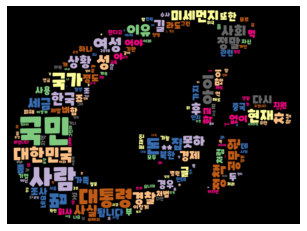

<Figure size 720x720 with 0 Axes>

In [126]:
icon = Image.open('logo.jpeg')
mask = Image.new('RGB', icon.size,(255,255,255))
mask.paste(icon,icon)
logo_mask = np.array(mask)

wordcloud = WordCloud(font_path = 'CookieRun_Black.ttf',
                      background_color='black',
                      colormap = "Accent_r",
                      mask = logo_mask,
                      width=300, height=300,
                      max_words = 200).generate_from_frequencies(dict_petitions)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.figure(figsize=(10,10))
plt.savefig('wordcloud_result.png')
plt.show()

# 데이터셋 다운

In [50]:
! git clone https://github.com/lovit/petitions_dataset.git

Cloning into 'petitions_dataset'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 112 (delta 5), reused 15 (delta 5), pack-reused 92
Receiving objects: 100% (112/112), 20.29 KiB | 1.56 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [51]:
ls

images/  install_mecab-ko_on_colab190912.sh  petitions_dataset/  README.md


In [52]:
cd petitions_dataset

/content/gdrive/My Drive/petition/petitions_dataset/Mecab-ko-for-Google-Colab/petitions_dataset


In [53]:
ls

build_dataset.py  petitions_dataset/  README.md  setup.py


In [54]:
! bash setup.py

setup.py: line 1: import: command not found
from: can't read /var/mail/setuptools
setup.py: line 4: syntax error near unexpected token `('
setup.py: line 4: `with open('README.md', encoding='utf-8') as f:'


In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My Drive/petition

/content/gdrive/My Drive/petition


In [0]:
from petitions_dataset import fetch
data_dir = '/content/gdrive/My Drive/petition'
fetch(data_dir)

It needs about 0.65 GB storage. Continue to download? ([Y]es, [N]o)
Y
downloaded petitions_2017-08
downloaded petitions_2017-09
downloaded petitions_2017-10
downloaded petitions_2017-11
downloaded petitions_2017-12
downloaded petitions_2018-01
downloaded petitions_2018-02
downloaded petitions_2018-03
downloaded petitions_2018-04
downloaded petitions_2018-05
downloaded petitions_2018-06
downloaded petitions_2018-07
downloaded petitions_2018-08
downloaded petitions_2018-09
downloaded petitions_2018-10
downloaded petitions_2018-11
downloaded petitions_2018-12
downloaded petitions_2019-01
downloaded petitions_2019-02
downloaded petitions_2019-03
downloaded petitions_2019-04
downloaded petitions_2019-05
downloaded petitions_2019-06
downloaded petitions_2019-07
downloaded petitions_2019-08


# NLP 라이브러리 다운

In [17]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 47 (delta 16), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [18]:
cd Mecab-ko-for-Google-Colab/

/content/gdrive/My Drive/petition/petitions_dataset/Mecab-ko-for-Google-Colab


In [19]:
! bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 233kB/s 
     |████████████████████████████████| 491kB 47.3MB/s 
     |████████████████████████████████| 92kB 11.8MB/s 
  Created wheel for JPype1: filename=JPype1-0.7.1-cp36-cp36m-linux_x86_64.whl size=2435957 sha256=4e97c373c42ae1b61d46145c9e0d56cb1bdb4c54c2f6128d287b93187270634f
  Stored in directory: /root/.cache/pip/wheels/b0/49/6a/4393ef8542c00becf80691bd242693db9e263d6e499323a984
Successfully built JPype1
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-01-07 13:30:09--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket